In [1]:
import re
import pandas as pd
import numpy as np
import emoji
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

In [2]:
Data='C:/Users/User/Downloads/WhatsApp Chat with BATCH PGDA 24.txt'
data1=open(Data,'r',encoding='utf=8')
data=data1.read()
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages=re.split(pattern,data)[1:]
dates=re.findall(pattern,data)[0:]
df=pd.DataFrame({'user_message': messages,'message_date':dates})
df.rename(columns={'message_date': 'date'}, inplace=True)
for i in df['user_message']:
        if ':' not in i:
            df.drop(df[df['user_message']== i].index , inplace=True)
users=[]
messages=[]
for message in df['user_message']:
    if ':' in message: 
        x=message.split(':')
        messages.append(x[1])
        users.append(x[0])
df['user']=users
df['message']=messages
date=[]
time=[]
for dt in df['date']:
    x=dt.split(',')
    date.append(x[0])
    time.append(x[1][:-2])
df['Date']=date
df['Time']=time    
df.drop(columns=['user_message','date'],inplace=True)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month_name()
df['day']=df['Date'].dt.day
df.drop(columns=['Date'],inplace=True)
def split_str(str):
    ref_dict = {
            '\x07':'a',
            '\x08':'b',
            '\x0C':'f',
            '\n':'n',
            '\r':'r',
            '\t':'t',
            '\x0b':'v',                
        }    
    res_arr = []
    temp = ''
    for i in str :
        if not i == '\\':
            if i in ref_dict:
                if not temp == "":
                    res_arr.append(temp)
                res_arr.append(ref_dict[i])
                temp = ''
            else:    
                temp += i
        else:
            if not temp == '':
                res_arr.append(temp)
            temp = ''
    res_arr.append(temp)
    return res_arr
m=[]
for i in df['message']:
    c=split_str(i)
    m.append(c[0])
df['Message']=m
df.drop(columns=['message'],inplace=True)
sentiment=SentimentIntensityAnalyzer()
tweet_str = ""
df['positive']=[sentiment.polarity_scores(tweet_str + " " + tweet)['pos'] for tweet in df['Message']]
df['negative']=[sentiment.polarity_scores(tweet_str + " " + tweet)['neg'] for tweet in df['Message']]
df['neutral']=[sentiment.polarity_scores(tweet_str + " " + tweet)['neu'] for tweet in df['Message']]
df.loc[df['positive']>=0.5,'positive']= 'positive'
df.loc[df.neutral>0.5,'positive']= 'neutral'
df.loc[df.negative>0.5,'positive']= 'negative'
df.drop(columns=['negative','neutral'],inplace=True)
df.rename(columns={'positive': 'sentiment'}, inplace=True)
df         

,user,Time,year,month,day,Message,sentiment
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi,neutral
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>,neutral
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name,neutral
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra,neutral
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair,neutral
...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123,neutral
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123,neutral
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https,neutral
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq,neutral


In [3]:
df[df.sentiment=='negative']

,user,Time,year,month,day,Message,sentiment
52,Manokamana Ma'am Imarticus,11:54,2021,December,18,No sat sun,negative
396,+91 99000 85347,16:48,2022,January,24,Haan my bad,negative
945,Shravani Imarticus.,10:28,2022,May,18,same problem,negative


In [4]:
df[df.sentiment=='positive']

,user,Time,year,month,day,Message,sentiment
9,Manokamana Ma'am Imarticus,20:25,2021,December,11,Ok,positive
11,Manokamana Ma'am Imarticus,20:27,2021,December,11,Ok,positive
22,Manokamana Ma'am Imarticus,19:44,2021,December,13,"Dear Students,",positive
26,+91 96321 74946,11:29,2021,December,15,Good morning Madam,positive
30,+91 89216 76557,11:31,2021,December,15,Yes,positive
...,...,...,...,...,...,...,...
1146,+91 72810 11292,16:32,2022,June,19,Okay sir..🥺🥺,positive
1148,Kiran Khamitkar Imarticus,08:38,2022,June,20,Good morning Dear students,positive
1158,Kiran Khamitkar Imarticus,14:48,2022,June,22,just like that,positive
1192,JEEVAN RAJ Imarticus,17:23,2022,June,27,Is it secured?,positive


In [5]:
df[df.sentiment=='neutral']

,user,Time,year,month,day,Message,sentiment
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi,neutral
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>,neutral
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name,neutral
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra,neutral
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair,neutral
...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123,neutral
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123,neutral
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https,neutral
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq,neutral


# full process

In [106]:
Data='C:/Users/User/Downloads/WhatsApp Chat with BATCH PGDA 24.txt'
#import chat from(raw chat will get from export chat from whatsapp) whatsapp
data1=open(Data,'r',encoding='utf=8')
data=data1.read()
data
# this is how format of the chat file is, it consist date,time,username or num,messages. let's clean unwanted texts sach as 'created group','joined group'
# etc, etc.. l

'12/10/21, 17:18 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n12/8/21, 11:40 - Manokamana Ma\'am Imarticus created group "BATCH PGA 24"\n12/10/21, 17:18 - You joined using this group\'s invite link\n12/10/21, 17:54 - +91 99626 27627 joined using this group\'s invite link\n12/10/21, 19:03 - Manokamana Ma\'am Imarticus: Hi \n\nPlease add all info to complete your admission process.\n\nhttps://docs.google.com/forms/u/1/d/e/1FAIpQLSeVrDDTD-zHVQFWGaoF20JyfebjgGcxhr343j0N5Od3GqPqRw/viewform\n12/11/21, 20:19 - Manokamana Ma\'am Imarticus: <Media omitted>\n12/11/21, 20:19 - Manokamana Ma\'am Imarticus: Plz confirm name\n12/11/21, 20:20 - +91 86607 64929: Abhishek mohapatra\n12/11/21, 20:20 - Pranav Imarticus: Pranav G Nair\n12/11/21, 20:25 - Manokamana Ma\'am Imarticus: Ok\n12/11/21, 20:26 - +91 88674 17211: Karthik N\n12/11/21, 20:27 - Manokamana Ma\'am Imarticus: Ok\n12/11/21, 20:34 - Shabnam Im

In [107]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages=re.split(pattern,data)[1:]   #split date and #user_messages
dates=re.findall(pattern,data)[0:]    
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Manokamana Ma\'am Imarticus created group "BATCH PGA 24"\n', "You joined using this group's invite link\n", "+91 99626 27627 joined using this group's invite link\n", "Manokamana Ma'am Imarticus: Hi \n\nPlease add all info to complete your admission process.\n\nhttps://docs.google.com/forms/u/1/d/e/1FAIpQLSeVrDDTD-zHVQFWGaoF20JyfebjgGcxhr343j0N5Od3GqPqRw/viewform\n", "Manokamana Ma'am Imarticus: <Media omitted>\n", "Manokamana Ma'am Imarticus: Plz confirm name\n", '+91 86607 64929: Abhishek mohapatra\n', 'Pranav Imarticus: Pranav G Nair\n', "Manokamana Ma'am Imarticus: Ok\n", '+91 88674 17211: Karthik N\n', "Manokamana Ma'am Imarticus: Ok\n", 'Shabnam Imarticus: Fathima Shabnam\n', '+91 96645 20856: Heet Bhalala\n', '+91 97531 32012: Dhananjay Daharia\n', "Manokamana Ma'am Imarticus: Hi all any one is going with zero cost emi plz mail me or 

In [108]:
print(dates)

['12/10/21, 17:18 - ', '12/8/21, 11:40 - ', '12/10/21, 17:18 - ', '12/10/21, 17:54 - ', '12/10/21, 19:03 - ', '12/11/21, 20:19 - ', '12/11/21, 20:19 - ', '12/11/21, 20:20 - ', '12/11/21, 20:20 - ', '12/11/21, 20:25 - ', '12/11/21, 20:26 - ', '12/11/21, 20:27 - ', '12/11/21, 20:34 - ', '12/11/21, 21:26 - ', '12/12/21, 07:51 - ', '12/13/21, 12:13 - ', '12/13/21, 12:17 - ', '12/13/21, 12:45 - ', '12/13/21, 14:19 - ', '12/13/21, 15:02 - ', '12/13/21, 16:09 - ', '12/13/21, 17:43 - ', '12/13/21, 19:44 - ', '12/14/21, 11:55 - ', '12/14/21, 16:43 - ', '12/15/21, 11:28 - ', '12/15/21, 11:29 - ', '12/15/21, 11:30 - ', '12/15/21, 11:31 - ', '12/15/21, 11:31 - ', '12/15/21, 11:31 - ', '12/15/21, 11:32 - ', '12/15/21, 11:32 - ', '12/15/21, 11:32 - ', '12/15/21, 11:32 - ', '12/15/21, 11:32 - ', '12/15/21, 11:47 - ', '12/15/21, 11:47 - ', '12/15/21, 12:04 - ', '12/15/21, 12:05 - ', '12/15/21, 12:26 - ', '12/15/21, 12:46 - ', '12/15/21, 12:56 - ', '12/15/21, 12:57 - ', '12/15/21, 17:56 - ', '12/15/21,

In [109]:
df=pd.DataFrame({'user_message': messages,'message_date':dates}) # create a dataframe using both list of date and messages
df.rename(columns={'message_date': 'date'}, inplace=True)
print(df.head()) 
print(df.shape)

                                        user_message                date
0  Messages and calls are end-to-end encrypted. N...  12/10/21, 17:18 - 
1  Manokamana Ma'am Imarticus created group "BATC...   12/8/21, 11:40 - 
2        You joined using this group's invite link\n  12/10/21, 17:18 - 
3  +91 99626 27627 joined using this group's invi...  12/10/21, 17:54 - 
4  Manokamana Ma'am Imarticus: Hi \n\nPlease add ...  12/10/21, 19:03 - 
(1216, 2)


In [110]:
# user_message we need to split , in order to get username and message column separate
for i in df['user_message']:           # there are some columns which doesnot contain ":" so we need to remove those rows 
        if ':' not in i:
            df.drop(df[df['user_message']== i].index , inplace=True)
print(df.head()) 
print(df.shape)            

                                        user_message                date
4  Manokamana Ma'am Imarticus: Hi \n\nPlease add ...  12/10/21, 19:03 - 
5      Manokamana Ma'am Imarticus: <Media omitted>\n  12/11/21, 20:19 - 
6     Manokamana Ma'am Imarticus: Plz confirm name\n  12/11/21, 20:19 - 
7              +91 86607 64929: Abhishek mohapatra\n  12/11/21, 20:20 - 
8                  Pranav Imarticus: Pranav G Nair\n  12/11/21, 20:20 - 
(1170, 2)


In [111]:
# now we have to split the column to separate user and messages, splitting by ':' 
users=[]
messages=[]
for message in df['user_message']:
    if ':' in message:
        x=message.split(':')
        messages.append(x[1])
        users.append(x[0])
df['user']=users
df['message']=messages
df                        #now we got separate columns users and message 

,user_message,date,user,message
4,Manokamana Ma'am Imarticus: Hi \n\nPlease add ...,"12/10/21, 19:03 -",Manokamana Ma'am Imarticus,Hi \n\nPlease add all info to complete your a...
5,Manokamana Ma'am Imarticus: <Media omitted>\n,"12/11/21, 20:19 -",Manokamana Ma'am Imarticus,<Media omitted>\n
6,Manokamana Ma'am Imarticus: Plz confirm name\n,"12/11/21, 20:19 -",Manokamana Ma'am Imarticus,Plz confirm name\n
7,+91 86607 64929: Abhishek mohapatra\n,"12/11/21, 20:20 -",+91 86607 64929,Abhishek mohapatra\n
8,Pranav Imarticus: Pranav G Nair\n,"12/11/21, 20:20 -",Pranav Imarticus,Pranav G Nair\n
...,...,...,...,...
1211,Kiran Khamitkar Imarticus: im@rticu5@123\n,"6/29/22, 14:29 -",Kiran Khamitkar Imarticus,im@rticu5@123\n
1212,+91 86989 43806: im@rticu5@123\n,"6/29/22, 14:29 -",+91 86989 43806,im@rticu5@123\n
1213,Kiran Khamitkar Imarticus: https://youtu.be/iZ...,"6/29/22, 21:43 -",Kiran Khamitkar Imarticus,https
1214,JEEVAN RAJ Imarticus: Tq\n,"6/29/22, 22:08 -",JEEVAN RAJ Imarticus,Tq\n


In [112]:
# now lets split data in order to get date, time, day separate columns
date=[]
time=[]
for dt in df['date']:
    x=dt.split(',')
    date.append(x[0])
    time.append(x[1][:-2])
df['Date']=date
df['Time']=time
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month_name()
df['day']=df['Date'].dt.day
df

,user_message,date,user,message,Date,Time,year,month,day
4,Manokamana Ma'am Imarticus: Hi \n\nPlease add ...,"12/10/21, 19:03 -",Manokamana Ma'am Imarticus,Hi \n\nPlease add all info to complete your a...,2021-12-10,19:03,2021,December,10
5,Manokamana Ma'am Imarticus: <Media omitted>\n,"12/11/21, 20:19 -",Manokamana Ma'am Imarticus,<Media omitted>\n,2021-12-11,20:19,2021,December,11
6,Manokamana Ma'am Imarticus: Plz confirm name\n,"12/11/21, 20:19 -",Manokamana Ma'am Imarticus,Plz confirm name\n,2021-12-11,20:19,2021,December,11
7,+91 86607 64929: Abhishek mohapatra\n,"12/11/21, 20:20 -",+91 86607 64929,Abhishek mohapatra\n,2021-12-11,20:20,2021,December,11
8,Pranav Imarticus: Pranav G Nair\n,"12/11/21, 20:20 -",Pranav Imarticus,Pranav G Nair\n,2021-12-11,20:20,2021,December,11
...,...,...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus: im@rticu5@123\n,"6/29/22, 14:29 -",Kiran Khamitkar Imarticus,im@rticu5@123\n,2022-06-29,14:29,2022,June,29
1212,+91 86989 43806: im@rticu5@123\n,"6/29/22, 14:29 -",+91 86989 43806,im@rticu5@123\n,2022-06-29,14:29,2022,June,29
1213,Kiran Khamitkar Imarticus: https://youtu.be/iZ...,"6/29/22, 21:43 -",Kiran Khamitkar Imarticus,https,2022-06-29,21:43,2022,June,29
1214,JEEVAN RAJ Imarticus: Tq\n,"6/29/22, 22:08 -",JEEVAN RAJ Imarticus,Tq\n,2022-06-29,22:08,2022,June,29


In [113]:
#now lets drop user_message and date columns
df.drop(columns=['user_message','date','Date'],inplace=True)
df

,user,message,Time,year,month,day
4,Manokamana Ma'am Imarticus,Hi \n\nPlease add all info to complete your a...,19:03,2021,December,10
5,Manokamana Ma'am Imarticus,<Media omitted>\n,20:19,2021,December,11
6,Manokamana Ma'am Imarticus,Plz confirm name\n,20:19,2021,December,11
7,+91 86607 64929,Abhishek mohapatra\n,20:20,2021,December,11
8,Pranav Imarticus,Pranav G Nair\n,20:20,2021,December,11
...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,im@rticu5@123\n,14:29,2022,June,29
1212,+91 86989 43806,im@rticu5@123\n,14:29,2022,June,29
1213,Kiran Khamitkar Imarticus,https,21:43,2022,June,29
1214,JEEVAN RAJ Imarticus,Tq\n,22:08,2022,June,29


In [114]:
#lets remove the '\n's in messages
def split_str(str):
    ref_dict = {
            '\x07':'a',
            '\x08':'b',
            '\x0C':'f',
            '\n':'n',
            '\r':'r',
            '\t':'t',
            '\x0b':'v',                
        }    
    res_arr = []
    temp = ''
    for i in str :
        if not i == '\\':
            if i in ref_dict:
                if not temp == "":
                    res_arr.append(temp)
                res_arr.append(ref_dict[i])
                temp = ''
            else:    
                temp += i
        else:
            if not temp == '':
                res_arr.append(temp)
            temp = ''
    res_arr.append(temp)
    return res_arr
m=[]
for i in df['message']:
    c=split_str(i)
    m.append(c[0])
print(m)    # all '\n's are removed from messges, so messages are cleaned now.

[' Hi ', ' <Media omitted>', ' Plz confirm name', ' Abhishek mohapatra', ' Pranav G Nair', ' Ok', ' Karthik N', ' Ok', ' Fathima Shabnam', ' Heet Bhalala', ' Dhananjay Daharia', ' Hi all any one is going with zero cost emi plz mail me or call me for details', ' Pooja R', ' Aman Ashutosh', ' Hi ', ' Hi ', ' Dear Students,', ' Good morning Madam', ' Hi All Good morning', ' any one want to go with EMI plz confirm', ' as we need to process it now', ' Yes', ' Yes me', ' plz send details on mail', ' i have sent formate', ' Hi ', ' plz mail me all details', ' <Media omitted>', ' November month placed students', ' Out of how many students', ' these are few', ' We place only above 3.5 LPA package student details', ' Highest is 5??', ' more than that', ' this month we placed at 7 PLA', " Ma'am what will be our class timings and do we have classes on sat & sun too", ' Hi ', ' .', ' No sat sun', ' Its 4 days a week', ' And morning batch', ' Ok', ' Done👍🏻', ' 4 or 5', ' 4', ' Tue to friday', ' This

In [115]:
df['Message']=m
df.drop(columns=['message'],inplace=True)
df  ##now whatsapp data is cleaned, we can analyse the whatsapp data  

,user,Time,year,month,day,Message
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair
...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq


In [116]:
x=[]
for message in df['Message']:
    y=message.strip()
    x.append(y)
df['Message']=x    
z=[]
for user in df['user']:
    b=user.strip()
    z.append(b)
df['user']=z
df

,user,Time,year,month,day,Message
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair
...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq


# sentimental analyses on chat

In [117]:
# lets do the sentimental analyses on whatsapp messages
from nltk.sentiment.vader import SentimentIntensityAnalyzer #import inbuilt sentiment analyzer 
sentiment=SentimentIntensityAnalyzer()
tweet_str = ""
df['positive']=[sentiment.polarity_scores(tweet_str + " " + tweet)['pos'] for tweet in df['Message']]
df['negative']=[sentiment.polarity_scores(tweet_str + " " + tweet)['neg'] for tweet in df['Message']]
df['neutral']=[sentiment.polarity_scores(tweet_str + " " + tweet)['neu'] for tweet in df['Message']]
df

,user,Time,year,month,day,Message,positive,negative,neutral
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi,0.000,0.0,1.000
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>,0.000,0.0,1.000
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name,0.394,0.0,0.606
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra,0.000,0.0,1.000
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair,0.000,0.0,1.000
...,...,...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123,0.000,0.0,1.000
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123,0.000,0.0,1.000
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https,0.000,0.0,1.000
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq,0.000,0.0,1.000


In [118]:
#now we need to conclude sentiment above 0.5 is TRUE
df.loc[df['positive']>=0.5,'positive']= 'positive'
df.loc[df.neutral>0.5,'positive']= 'neutral'
df.loc[df.negative>0.5,'positive']= 'negative'
df

,user,Time,year,month,day,Message,positive,negative,neutral
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi,neutral,0.0,1.000
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>,neutral,0.0,1.000
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name,neutral,0.0,0.606
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra,neutral,0.0,1.000
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair,neutral,0.0,1.000
...,...,...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123,neutral,0.0,1.000
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123,neutral,0.0,1.000
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https,neutral,0.0,1.000
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq,neutral,0.0,1.000


In [119]:
#lets drop negative and neutral columns and rename positive column as sentiment for final structure 
df.drop(columns=['negative','neutral'],inplace=True)
df.rename(columns={'positive': 'sentiment'}, inplace=True)
df 

,user,Time,year,month,day,Message,sentiment
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi,neutral
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>,neutral
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name,neutral
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra,neutral
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair,neutral
...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123,neutral
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123,neutral
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https,neutral
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq,neutral


# Let's Analyse

In [120]:
#lets analyse
print(df[df.sentiment=='negative'].head())
print('\n')
print(df[df.sentiment=='positive'].head())
print('\n')
print(df[df.sentiment=='neutral'].head())

                           user     Time  year     month  day       Message  \
52   Manokamana Ma'am Imarticus   11:54   2021  December   18    No sat sun   
396             +91 99000 85347   16:48   2022   January   24   Haan my bad   
945         Shravani Imarticus.   10:28   2022       May   18  same problem   

    sentiment  
52   negative  
396  negative  
945  negative  


                          user     Time  year     month  day  \
9   Manokamana Ma'am Imarticus   20:25   2021  December   11   
11  Manokamana Ma'am Imarticus   20:27   2021  December   11   
22  Manokamana Ma'am Imarticus   19:44   2021  December   13   
26             +91 96321 74946   11:29   2021  December   15   
30             +91 89216 76557   11:31   2021  December   15   

               Message sentiment  
9                   Ok  positive  
11                  Ok  positive  
22      Dear Students,  positive  
26  Good morning Madam  positive  
30                 Yes  positive  


                    

In [121]:
df['Message'].value_counts().head(10)

<Media omitted>             391
This message was deleted     38
https                        34
Hi All                       15
Ok sir                       11
Hi                           10
@917204940797                 8
👍🏻                            7
Hi all                        6
Thank you sir                 6
Name: Message, dtype: int64

In [122]:
x=df['user'].value_counts().head(10)
x

+91 98450 36391               420
Kiran Khamitkar Imarticus     139
+91 72810 11292               119
Manokamana Ma'am Imarticus     60
JEEVAN RAJ Imarticus           50
+91 95448 40931                41
+91 6366 846 777               40
+91 90197 99948                28
+91 99000 85347                26
+91 94944 89908                24
Name: user, dtype: int64

In [123]:
name=x.index
count=x.values

<function matplotlib.pyplot.show(close=None, block=None)>

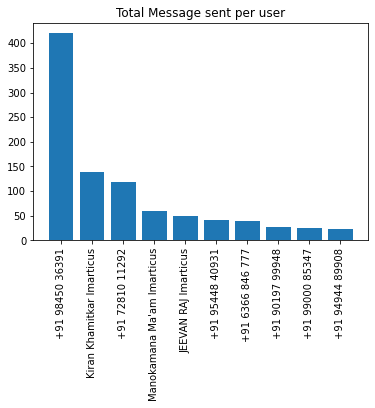

In [219]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.title('Total Message sent per user')
plt.show

In [125]:
dd=df[df['Message']!= 'This message was deleted']
dd=dd[dd['Message']!= '<Media omitted>']

In [126]:
words=[]
for message in dd['Message']:
    words.extend(message.split())

In [127]:
words

['Hi',
 'Plz',
 'confirm',
 'name',
 'Abhishek',
 'mohapatra',
 'Pranav',
 'G',
 'Nair',
 'Ok',
 'Karthik',
 'N',
 'Ok',
 'Fathima',
 'Shabnam',
 'Heet',
 'Bhalala',
 'Dhananjay',
 'Daharia',
 'Hi',
 'all',
 'any',
 'one',
 'is',
 'going',
 'with',
 'zero',
 'cost',
 'emi',
 'plz',
 'mail',
 'me',
 'or',
 'call',
 'me',
 'for',
 'details',
 'Pooja',
 'R',
 'Aman',
 'Ashutosh',
 'Hi',
 'Hi',
 'Dear',
 'Students,',
 'Good',
 'morning',
 'Madam',
 'Hi',
 'All',
 'Good',
 'morning',
 'any',
 'one',
 'want',
 'to',
 'go',
 'with',
 'EMI',
 'plz',
 'confirm',
 'as',
 'we',
 'need',
 'to',
 'process',
 'it',
 'now',
 'Yes',
 'Yes',
 'me',
 'plz',
 'send',
 'details',
 'on',
 'mail',
 'i',
 'have',
 'sent',
 'formate',
 'Hi',
 'plz',
 'mail',
 'me',
 'all',
 'details',
 'November',
 'month',
 'placed',
 'students',
 'Out',
 'of',
 'how',
 'many',
 'students',
 'these',
 'are',
 'few',
 'We',
 'place',
 'only',
 'above',
 '3.5',
 'LPA',
 'package',
 'student',
 'details',
 'Highest',
 'is',
 '5

In [128]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,the,155
1,sir,84
2,to,63
3,you,59
4,Please,49
5,Hi,47
6,in,46
7,all,44
8,on,43
9,I,43


In [129]:
from nltk.corpus import stopwords
stopwordslist=stopwords.words('english')

In [130]:
def stopwords_removal(texts):
    x=[]
    for i in texts.split():
        if i not in stopwordslist:
            x.append(i)
    y=x[:]
    x.clear()
    return y       

In [131]:
most_messages=dd['Message'].apply(stopwords_removal)
most_messages

4                        [Hi]
6        [Plz, confirm, name]
7       [Abhishek, mohapatra]
8           [Pranav, G, Nair]
9                        [Ok]
                ...          
1211          [im@rticu5@123]
1212          [im@rticu5@123]
1213                  [https]
1214                     [Tq]
1215                [Hi, All]
Name: Message, Length: 741, dtype: object

In [134]:
def join_back(list_input):
    return ' '.join(list_input)

In [139]:
most_messages=dd['Message'].apply(join_back)

In [141]:
most_messages.value_counts().head()

https            34
Hi All           15
Ok sir           11
Hi               10
@917204940797     8
Name: Message, dtype: int64

In [152]:
dd['msg_length'] = dd['Message'].apply(lambda x: len(x))
avg_msg_lengths =dd.groupby('user').mean().reset_index().sort_values(by = 'msg_length', ascending = False)
x=avg_msg_lengths.head(10)
x

,user,year,day,msg_length
24,+91 98450 36391,2022.000000,14.617188,51.679688
14,+91 91488 95835,2022.000000,22.222222,45.111111
25,+91 99000 85347,2021.960000,12.760000,43.400000
3,+91 72810 11292,2021.961165,17.000000,36.514563
31,Pramod,2022.000000,15.250000,34.500000
12,+91 90081 98035,2022.000000,28.000000,32.000000
26,+91 99626 27627,2022.000000,16.000000,30.923077
13,+91 90197 99948,2022.000000,19.173913,25.608696
7,+91 86989 43806,2022.000000,15.157895,24.684211
6,+91 86607 64929,2021.000000,15.400000,24.200000


Text(0.5, 1.0, 'Average Message Lengths')

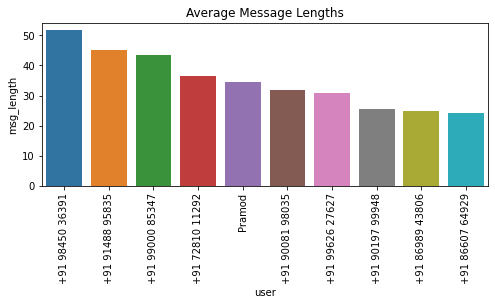

In [158]:
# Barplot of average message lengths
plt.figure(figsize=(8,3))
sns.barplot(x=x.user, y =x.msg_length, data =x)
plt.xticks(rotation='vertical')
plt.title('Average Message Lengths')

In [161]:
month_msg=df.month.value_counts()
month_msg

January     322
May         229
March       146
June        132
February    125
April       117
December     99
Name: month, dtype: int64

Text(0.5, 1.0, 'Total messages sent grouped by month')

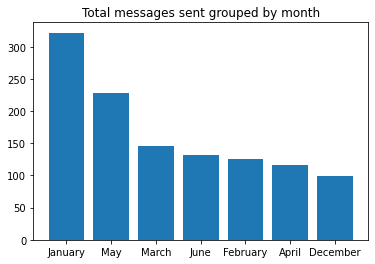

In [178]:
plt.bar(month_msg.index,month_msg.values)
plt.title('Total messages sent grouped by month')

# Full model deployment for application

In [216]:
import re
import pandas as pd
import numpy as np
import emoji
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#full model deployment for application
def processor(Data):
    data1=open(Data,'r',encoding='utf=8')
    data=data1.read()
    pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
    messages=re.split(pattern,data)[1:]
    dates=re.findall(pattern,data)[0:]
    df=pd.DataFrame({'user_message': messages,'message_date':dates})
    df.rename(columns={'message_date': 'date'}, inplace=True)
    for i in df['user_message']:
            if ':' not in i:
                df.drop(df[df['user_message']== i].index , inplace=True)
    users=[]
    messages=[]
    for message in df['user_message']:
        if ':' in message: 
            x=message.split(':')
            messages.append(x[1])
            users.append(x[0])
    df['user']=users
    df['message']=messages
    date=[]
    time=[]
    for dt in df['date']:
        x=dt.split(',')
        date.append(x[0])
        time.append(x[1][:-2])
    df['Date']=date
    df['Time']=time    
    df.drop(columns=['user_message','date'],inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    df['year']=df['Date'].dt.year
    df['month']=df['Date'].dt.month_name()
    df['day']=df['Date'].dt.day
    df.drop(columns=['Date'],inplace=True)
    def split_str(str):
        ref_dict = {
                '\x07':'a',
                '\x08':'b',
                '\x0C':'f',
                '\n':'n',
                '\r':'r',
                '\t':'t',
                '\x0b':'v',                
            }    
        res_arr = []
        temp = ''
        for i in str :
            if not i == '\\':
                if i in ref_dict:
                    if not temp == "":
                        res_arr.append(temp)
                    res_arr.append(ref_dict[i])
                    temp = ''
                else:    
                    temp += i
            else:
                if not temp == '':
                    res_arr.append(temp)
                temp = ''
        res_arr.append(temp)
        return res_arr
    m=[]
    for i in df['message']:
        c=split_str(i)
        m.append(c[0])
    df['Message']=m
    df.drop(columns=['message'],inplace=True)
    sentiment=SentimentIntensityAnalyzer()
    tweet_str = ""
    df['positive']=[sentiment.polarity_scores(tweet_str + " " + tweet)['pos'] for tweet in df['Message']]
    df['negative']=[sentiment.polarity_scores(tweet_str + " " + tweet)['neg'] for tweet in df['Message']]
    df['neutral']=[sentiment.polarity_scores(tweet_str + " " + tweet)['neu'] for tweet in df['Message']]
    df.loc[df['positive']>=0.5,'positive']= 'positive'
    df.loc[df.neutral>0.5,'positive']= 'neutral'
    df.loc[df.negative>0.5,'positive']= 'negative'
    df.drop(columns=['negative','neutral'],inplace=True)
    df.rename(columns={'positive': 'sentiment'}, inplace=True)
    x=[]
    for message in df['Message']:
        y=message.strip()
        x.append(y)
    df['Message']=x
    z=[]
    for user in df['user']:
        b=user.strip()
        z.append(b)
    df['user']=z
    return df

In [217]:
processor('C:/Users/User/Downloads/WhatsApp Chat with BATCH PGDA 24.txt')

,user,Time,year,month,day,Message,sentiment
4,Manokamana Ma'am Imarticus,19:03,2021,December,10,Hi,neutral
5,Manokamana Ma'am Imarticus,20:19,2021,December,11,<Media omitted>,neutral
6,Manokamana Ma'am Imarticus,20:19,2021,December,11,Plz confirm name,neutral
7,+91 86607 64929,20:20,2021,December,11,Abhishek mohapatra,neutral
8,Pranav Imarticus,20:20,2021,December,11,Pranav G Nair,neutral
...,...,...,...,...,...,...,...
1211,Kiran Khamitkar Imarticus,14:29,2022,June,29,im@rticu5@123,neutral
1212,+91 86989 43806,14:29,2022,June,29,im@rticu5@123,neutral
1213,Kiran Khamitkar Imarticus,21:43,2022,June,29,https,neutral
1214,JEEVAN RAJ Imarticus,22:08,2022,June,29,Tq,neutral
